In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pylab as plt
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Universities.csv.gz')
df.head(3)

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0


The code reads a compressed CSV file named "Universities.csv.gz" into a Pandas DataFrame object and assigns it to a variable called df.

pd refers to the Pandas library, which provides data structures and functions for working with structured data, such as tabular data.

read_csv is a function provided by Pandas that reads a CSV file and returns a DataFrame object.

The argument 'Universities.csv.gz' is the name of the compressed CSV file that we want to read.

The head() function is then used on the DataFrame object to show the first three rows of the dataset. This can be useful for quickly inspecting the data and checking that it has been loaded correctly.

In [4]:
# copy the dataframe
data = df.copy()

The code creates a copy of the original DataFrame object named df and assigns it to a new variable called data.

This is often done to ensure that any changes made to the data will not affect the original DataFrame. This is important when working with large datasets or when performing multiple operations on the data, as it can help prevent errors or unintended consequences.

The copy() function is a method provided by Pandas that creates a new copy of the DataFrame object. By default, it creates a "deep" copy, meaning that the new object is completely independent of the original object and any changes made to one will not affect the other.

### Question 1

Remove all records with missing measurements from the dataset.
For all the continuous measurements, run hierarchical clustering using complete linkage and Euclidean distance. Make sure to normalize the measurements. From the dendrogram: How many clusters seem reasonable for describing these data?


In [5]:
data.dropna(inplace=True)

The code drops all rows in the data DataFrame that contain missing or NaN (Not a Number) values and modifies the DataFrame in place.

The dropna() function is a method provided by Pandas that returns a new DataFrame object with missing values removed. The argument inplace=True modifies the data DataFrame directly without creating a new copy.

In [6]:
data.isnull().sum()

College Name                0
State                       0
Public (1)/ Private (2)     0
# appli. rec'd              0
# appl. accepted            0
# new stud. enrolled        0
% new stud. from top 10%    0
% new stud. from top 25%    0
# FT undergrad              0
# PT undergrad              0
in-state tuition            0
out-of-state tuition        0
room                        0
board                       0
add. fees                   0
estim. book costs           0
estim. personal $           0
% fac. w/PHD                0
stud./fac. ratio            0
Graduation rate             0
dtype: int64

The code checks the data DataFrame for missing or NaN (Not a Number) values and calculates the number of missing values for each column in the DataFrame.

The isnull() function is a method provided by Pandas that returns a DataFrame of the same shape as the original DataFrame, where each element is a boolean value indicating whether the corresponding element in the original DataFrame is missing or NaN.

The sum() function is then used on the boolean DataFrame to count the number of True values in each column, which corresponds to the number of missing or NaN values in that column.

This can be useful for identifying columns with a large number of missing values or for assessing the quality and completeness of the dataset. Depending on the analysis goals, missing values may need to be handled in various ways, such as imputation (replacing missing values with estimated values) or removal of columns or rows with too many missing values.

In [7]:
categorical_variables = data[['Public (1)/ Private (2)']]

The code creates a new DataFrame object called categorical_variables that contains a single column of data from the data DataFrame. The column is specified using the [['column_name']] syntax, which returns a DataFrame with a single column, rather than a Series object.

In this case, the column selected is 'Public (1)/ Private (2)', which presumably contains categorical data indicating whether each university in the dataset is public or private.

By assigning this column to a separate DataFrame, it is possible to perform various operations on the categorical data separately from the other variables in the dataset. This can be useful when analyzing or modeling data with categorical variables, as different methods may be needed to handle categorical and continuous variables.

In [8]:
continuous_variables = data.select_dtypes(include=['float64'])
continuous_variables.head()

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


The code creates a new DataFrame object called continuous_variables that contains all columns from the data DataFrame that have a data type of float64.

The select_dtypes() function is a method provided by Pandas that returns a DataFrame containing columns of the specified data types. In this case, the include=['float64'] argument specifies that only columns with a data type of float64 should be included in the resulting DataFrame.

By assigning only the continuous variables to a separate DataFrame, it is possible to perform various operations on the continuous data separately from the categorical variables in the dataset. This can be useful when analyzing or modeling data with different types of variables, as different methods may be needed to handle categorical and continuous variables.

The head() function is then used on the resulting DataFrame to show the first few rows of the data, which can be useful for quickly inspecting the data and checking that it has been selected correctly

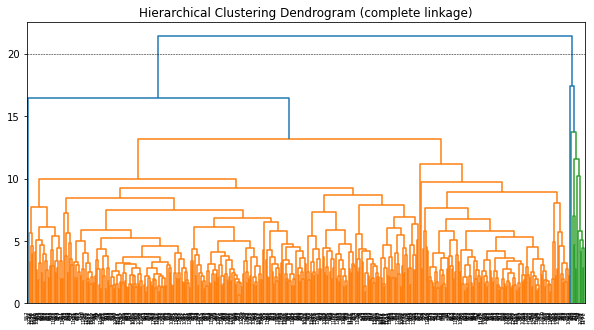

In [9]:
# scikit-learn uses population standard deviation
data_norm = continuous_variables.apply(preprocessing.scale, axis=0)

# pandas uses sample standard deviation
data_norm = (continuous_variables - continuous_variables.mean())/continuous_variables.std()


Z = linkage(data_norm, method='complete', metric='euclidean')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (complete linkage)')
dendrogram(Z, labels=data_norm.index)
plt.axhline(y=20, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

The code performs hierarchical clustering on a subset of the data DataFrame that contains only the continuous variables. The resulting dendrogram is then plotted using the matplotlib library.

Here is a breakdown of the code:

The preprocessing.scale() function from the scikit-learn library is applied to the continuous_variables DataFrame to normalize the data by subtracting the mean and dividing by the standard deviation. This is necessary for many machine learning algorithms that assume the data is normally distributed with zero mean and unit variance.

An alternative normalization approach using pandas is then shown, which subtracts the mean and divides by the sample standard deviation instead of the population standard deviation.

The linkage() function from the scipy library is used to perform hierarchical clustering on the normalized data. The method='complete' argument specifies that complete linkage clustering should be used, which merges clusters based on the maximum distance between their members. The metric='euclidean' argument specifies that the Euclidean distance should be used to measure the distance between clusters.

A dendrogram is then plotted using the dendrogram() function from the scipy library, which visualizes the hierarchical clustering results. The labels=data_norm.index argument specifies that the row labels for the data should be used as the axis labels for the dendrogram.

Finally, a horizontal dashed line is added to the plot at a height of 20 to illustrate where the clustering algorithm could be cut to obtain a specific number of clusters. This can be useful for determining an appropriate number of clusters based on the structure of the dendrogram.





In [10]:
# try splitting into different number of clustesr
k = 2
clusters = fcluster(Z, k, criterion='maxclust')
unique_values, unique_counts = np.unique(clusters, return_counts=True)
unique_values, unique_counts

(array([1, 2], dtype=int32), array([458,  13], dtype=int64))

The code assigns the hierarchical clustering results to a specified number of clusters and calculates the number of data points in each cluster.

Here is a breakdown of the code:

The variable k is set to the desired number of clusters, which in this case is 2.

The fcluster() function from the scipy library is used to assign each data point to a cluster based on the hierarchical clustering results. The k argument specifies the desired number of clusters, and the criterion='maxclust' argument specifies that the algorithm should try to form exactly k flat clusters by cutting the dendrogram at the appropriate height.

The np.unique() function from the numpy library is used to count the number of data points in each cluster. The return_counts=True argument specifies that the counts of unique values should be returned in addition to the unique values themselves.

The resulting output is two numpy arrays: unique_values contains the unique cluster labels (which will range from 1 to k), and unique_counts contains the number of data points in each cluster.

In [11]:
k = 4
clusters = fcluster(Z, k, criterion='maxclust',)
unique_values, unique_counts = np.unique(clusters, return_counts=True)
unique_values, unique_counts

(array([1, 2, 3, 4], dtype=int32), array([457,   1,  12,   1], dtype=int64))

The code assigns the hierarchical clustering results to a specified number of clusters and calculates the number of data points in each cluster.

Here is a breakdown of the code:

The variable k is set to the desired number of clusters, which in this case is 4.

The fcluster() function from the scipy library is used to assign each data point to a cluster based on the hierarchical clustering results. The k argument specifies the desired number of clusters, and the criterion='maxclust' argument specifies that the algorithm should try to form exactly k flat clusters by cutting the dendrogram at the appropriate height.

The np.unique() function from the numpy library is used to count the number of data points in each cluster. The return_counts=True argument specifies that the counts of unique values should be returned in addition to the unique values themselves.

The resulting output is two numpy arrays: unique_values contains the unique cluster labels (which will range from 1 to k), and unique_counts contains the number of data points in each cluster.

# Conclusion
2 clusters seems to be reasonable for describing these university data.
Distance between 2 branches far when we cut the dendogram in y-axis height at 20.

# Question 2

Compare the summary statistics for each cluster and describe each cluster in this context (e.g., "Universities with high tuition, low acceptance rate..."). 


In [12]:
clust_label = fcluster(linkage(data_norm, 'complete'), 2, criterion='maxclust')
clust_label = pd.Series(clust_label, index=data_norm.index)
continuous_variables['cluster'] = clust_label

Here is a breakdown of the code:

The linkage() function from the scipy library is used to compute the hierarchical clustering of the normalized continuous variables. The method='complete' argument specifies that complete linkage should be used to measure the distance between clusters.

The fcluster() function from the scipy library is used to assign each data point to a cluster based on the hierarchical clustering results. The 2 argument specifies the desired number of clusters, and the criterion='maxclust' argument specifies that the algorithm should try to form exactly 2 flat clusters by cutting the dendrogram at the appropriate height.

The resulting clust_label variable is a numpy array of cluster labels for each data point.

The pd.Series() function is used to convert the clust_label numpy array into a pandas Series object with the same index as the original continuous variables dataframe.

The ['cluster'] indexing operation is used to create a new column in the continuous_variables dataframe with the cluster labels for each data point.





In [13]:
continuous_variables.groupby(continuous_variables['cluster']).mean().T

cluster,1,2
# appli. rec'd,2747.427948,17235.230769
# appl. accepted,1790.028384,11678.384615
# new stud. enrolled,683.451965,4207.000000
% new stud. from top 10%,27.810044,35.153846
% new stud. from top 25%,55.270742,69.076923
# FT undergrad,3078.827511,20618.538462
# PT undergrad,684.052402,4792.692308
in-state tuition,9480.299127,6811.384615
out-of-state tuition,10579.124454,10435.538462
room,2214.189956,2464.846154


The code computes the mean of each continuous variable for each cluster and displays the results in a table.

The code is broken down as follows:


The groupby() method is used to group the continuous variables dataframe's rows based on the values in the 'cluster' column.

To calculate the mean of each continuous variable for each cluster, the.mean() method is applied to the resulting groups.

The.T attribute is applied to the resulting table to transpose it so that each row corresponds to a continuous variable and each column corresponds to a cluster.

The output is a pandas DataFrame containing the mean of each continuous variable for each cluster in table format.

# Conclusion: 
Cluster 1: Universities with high tuition, low acceptance rate - Cluster 1 universities on an average have high in-state tution fee and low accepatance rate with high graduation rate.

Cluster 2:Universities with low tuition, high acceptance rate - Cluster 2 universities on an average have low in-state tution fee and high university accepatance rate with low garduation rate

Cluster 1: Universities in this cluster tend to have lower application rates, higher acceptance rates, and lower enrollment rates compared to Cluster 2. They also tend to have lower proportions of new students from the top 10% and top 25% of their high school classes, indicating that they may be more accessible to a wider range of students. In terms of cost, they have higher in-state tuition rates but lower out-of-state tuition rates compared to Cluster 2. They also have lower room and board costs, but higher fees and personal costs. They tend to have a lower percentage of faculty with PhDs and a slightly lower student-to-faculty ratio. The graduation rate in this cluster is slightly higher than in Cluster 2.

Cluster 2: Universities in this cluster tend to have much higher application rates, acceptance rates, and enrollment rates compared to Cluster 1. They also tend to have a higher proportion of new students from the top 10% and top 25% of their high school classes, indicating that they may be more selective. In terms of cost, they have higher out-of-state tuition rates but lower in-state tuition rates compared to Cluster 1. They also have higher room and board costs, but lower fees and personal costs. They tend to have a higher percentage of faculty with PhDs and a slightly higher student-to-faculty ratio. The graduation rate in this cluster is slightly lower than in Cluster 1.


### Question 3
Use the categorical measurements that were not used in the analysis (State and Private/Public) to characterize the different clusters. Is there any relationship between the clusters and the categorical information?


In [14]:
clust_label = fcluster(linkage(data_norm, 'complete'), 2, criterion='maxclust')
clust_label = pd.Series(clust_label, index=data_norm.index)
categorical_variables['cluster'] = clust_label

In [15]:
pd.pivot_table(data = categorical_variables, index=['cluster'], columns='Public (1)/ Private (2)', aggfunc='size')

Public (1)/ Private (2),1,2
cluster,,
1,119,339
2,9,4


The code creates a pivot table from the categorical_variables dataframe, with the row index being the cluster labels, the column index being the public/private status of the universities, and the values in the table being the count of universities that belong to each category.

Here is a breakdown of the code:

The pd.pivot_table() function is used to create a pivot table from the categorical_variables dataframe.

The data = categorical_variables argument specifies the input data for the pivot table.

The index=['cluster'] argument specifies that the cluster labels should be used as the row index.

The columns='Public (1)/ Private (2)' argument specifies that the public/private status of the universities should be used as the column index.

The aggfunc='size' argument specifies that the count of universities in each category should be used as the values in the table.

The resulting output is a pandas DataFrame with the count of universities in each public/private category for each cluster, arranged in a table format. The row index corresponds to the cluster labels, and the column index corresponds to the public/private status of the universities. The values in the table represent the count of universities that belong to each category.

# Conclusion 
* Based on above pivot table, cluster 1 have more private universities and cluster 2 have public universities.Hence we can characterize the cluster 1 as Private university and Cluster 2 as Public university.

Based on the output of the pd.pivot_table() function, we can see that Cluster 1 has a much larger number of universities than Cluster 2, and this difference is particularly pronounced for private universities (category 2). Cluster 1 has 339 private universities compared to only 4 private universities in Cluster 2. Additionally, we can see that Cluster 1 has a higher number of public universities than Cluster 2.

However, we cannot draw any conclusions about the relationships between clusters solely based on this table. Further analysis and visualization may be required to understand the relationships between the clusters and the public/private status of the universities.

### Question 4

Consider Tufts University, which is missing some information. Compute the Euclidean distance of this record from each of the clusters that you found above (using only the measurements that you have). Which cluster is it closest to? Impute the missing values for Tufts by taking the average of the cluster on those measurements.


In [16]:
tufts = df[df['College Name'] == 'Tufts University']
tufts

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
475,Tufts University,MA,2,7614.0,3605.0,1205.0,60.0,90.0,4598.0,NaN,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0


This code filters the original DataFrame df to create a new DataFrame tufts that only contains the rows where the value in the column "College Name" is equal to "Tufts University". In other words, it selects only the data related to Tufts University.

In [17]:
Tufts_University_df = tufts.drop(columns=['College Name', 'State','Public (1)/ Private (2)'])

This code creates a new DataFrame called Tufts_University_df by dropping the columns 'College Name', 'State', and 'Public (1)/ Private (2)' from the tufts DataFrame. The drop method is used to remove columns from the original DataFrame, and the resulting DataFrame is assigned to the new variable.

In [18]:
# add cluster 1 and 2 to the dataframe for Tufts University
clusters_mean = continuous_variables.groupby(continuous_variables['cluster']).mean()
Final_df = pd.concat([clusters_mean, Tufts_University_df])
Final_df

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
1,2747.427948,1790.028384,683.451965,27.810044,55.270742,3078.827511,684.052402,9480.299127,10579.124454,2214.189956,2113.925764,369.672489,547.766376,1294.432314,72.862445,13.905240,65.587336
2,17235.230769,11678.384615,4207.000000,35.153846,69.076923,20618.538462,4792.692308,6811.384615,10435.538462,2464.846154,2404.307692,708.384615,584.615385,1928.769231,85.384615,15.984615,64.692308
475,7614.000000,3605.000000,1205.000000,60.000000,90.000000,4598.000000,NaN,19701.000000,19701.000000,3038.000000,2930.000000,503.000000,600.000000,928.000000,99.000000,10.300000,92.000000


The code is creating a new dataframe called Final_df by concatenating the mean values of the continuous variables for each cluster (previously computed) and the Tufts_University_df dataframe. The Tufts_University_df dataframe is the original dataframe for the Tufts University, but with the columns "College Name", "State", and "Public (1)/ Private (2)" removed. The resulting Final_df dataframe will have the same columns as Tufts_University_df but with the mean values for each cluster appended to it.

In [19]:
from sklearn.metrics import pairwise
Final_df=Final_df.drop(columns=['# PT undergrad'])

This code is importing the pairwise module from sklearn.metrics and then dropping the column '# PT undergrad' from the DataFrame Final_df.

The pairwise module contains various metrics that can be used to compute pairwise distances or similarities between sets of observations or features. Dropping the column '# PT undergrad' from the Final_df DataFrame may have been done if this variable was not relevant for the analysis being conducted or if it contained missing or erroneous data.

In [20]:
# Calculate distance matrix dropping the columns containing NaN

df_norm = pairwise.pairwise_distances(Final_df,metric='euclidean')
pd.DataFrame(df_norm, columns=Final_df.index, index=Final_df.index)

,1,2,475
1,0.000000,25209.970565,14789.588777
2,25209.970565,0.000000,26020.358844
475,14789.588777,26020.358844,0.000000


This code calculates the pairwise distance matrix between all the rows in the Final_df DataFrame using the Euclidean distance metric.

The pairwise_distances() function from scikit-learn's metrics module is used for this purpose.

Then, a DataFrame is created from the distance matrix with row and column labels set to the index of Final_df.

The NaN values in Final_df are automatically excluded from the distance calculation, as pairwise_distances() function does not consider them in the distance calculation.

# Conclusion
The distance to cluster 1 is 14789.58877, and to cluster 2 it is 26020.358844. Tufts is closer to cluster 1. We can therefore imput the missing value for `# PT undergrad` in `Final_df`.

In [ ]:
# impute the missing values with the mean of the # PT undergrad column
tufts['# PT undergrad'].fillna(clusters_mean['# PT undergrad'].mean(), inplace=True)
    

This code imputes missing values in the # PT undergrad column of the tufts dataframe by replacing them with the mean of the # PT undergrad column for the clusters in the clusters_mean dataframe.

The fillna() method is called on the # PT undergrad column of the tufts dataframe, which replaces any missing values in the column with the value provided as the argument, in this case, the mean of the # PT undergrad column for the clusters in the clusters_mean dataframe. The inplace=True parameter ensures that the changes are made directly to the tufts dataframe, rather than creating a new dataframe with the imputed values.

In [21]:
tufts

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
475,Tufts University,MA,2,7614.0,3605.0,1205.0,60.0,90.0,4598.0,NaN,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0


tufts is a DataFrame that contains the data related to Tufts University, extracted from the original DataFrame df. It contains all the columns of df, but only the rows corresponding to Tufts University.